<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Airborne_activity_Mazyr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Airborne activity_Mazyr_2007_2018.csv', parse_dates = ['Date'])
df.columns = ['Date', 'Conc']
df

,Date,Conc
0,2007-01-01,9.0
1,2007-01-02,5.0
2,2007-01-03,10.0
3,2007-01-04,10.0
4,2007-01-05,15.0
...,...,...
4104,2018-12-27,16.0
4105,2018-12-28,11.0
4106,2018-12-29,6.0
4107,2018-12-30,24.0


In [4]:
df.describe()

,Conc
count,4035.000000
mean,19.402478
std,12.789265
min,1.000000
25%,11.000000
50%,16.000000
75%,24.000000
max,115.000000


In [5]:
df = df.resample('W', on = 'Date').mean()
df

,Conc
Date,
2007-01-07,8.285714
2007-01-14,6.428571
2007-01-21,8.857143
2007-01-28,9.000000
2007-02-04,10.333333
...,...
2018-12-09,16.857143
2018-12-16,22.142857
2018-12-23,15.571429


In [6]:
#OK result = df03.iloc[:, 1].div(df03.Conc.mean(), axis = 0)
df.reset_index(inplace = True)
df['Week'] = df.Date.dt.isocalendar().week
df['Year'] = df.Date.dt.year
df

,Date,Conc,Week,Year
0,2007-01-07,8.285714,1,2007
1,2007-01-14,6.428571,2,2007
2,2007-01-21,8.857143,3,2007
3,2007-01-28,9.000000,4,2007
4,2007-02-04,10.333333,5,2007
...,...,...,...,...
622,2018-12-09,16.857143,49,2018
623,2018-12-16,22.142857,50,2018
624,2018-12-23,15.571429,51,2018
625,2018-12-30,13.285714,52,2018


In [7]:
df07 = df[df['Year'] == 2007]
df07

,Date,Conc,Week,Year
0,2007-01-07,8.285714,1,2007
1,2007-01-14,6.428571,2,2007
2,2007-01-21,8.857143,3,2007
3,2007-01-28,9.000000,4,2007
4,2007-02-04,10.333333,5,2007
5,2007-02-11,9.285714,6,2007
6,2007-02-18,15.142857,7,2007
7,2007-02-25,16.142857,8,2007
8,2007-03-04,16.714286,9,2007
9,2007-03-11,11.000000,10,2007


In [ ]:
#df_uni = df03.append(df04, sort = False)

In [8]:
#write function for calculating w_i
def wi_calc(my_df, year):
    df_x = my_df[my_df['Year'] == year].dropna()
    result = df_x.iloc[:, 1].div(df_x.Conc.mean(), axis = 0)
    return result

df07['w_i'] = wi_calc(df, 2007)
df07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Conc,Week,Year,w_i
0,2007-01-07,8.285714,1,2007,0.462986
1,2007-01-14,6.428571,2,2007,0.359213
2,2007-01-21,8.857143,3,2007,0.494916
3,2007-01-28,9.000000,4,2007,0.502899
4,2007-02-04,10.333333,5,2007,0.577402
5,2007-02-11,9.285714,6,2007,0.518864
6,2007-02-18,15.142857,7,2007,0.846147
7,2007-02-25,16.142857,8,2007,0.902025
8,2007-03-04,16.714286,9,2007,0.933955
9,2007-03-11,11.000000,10,2007,0.614654


In [10]:
df08 = df[df['Year'] == 2008]

In [11]:
df08['w_i'] = wi_calc(df, 2008)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df08.dropna()

,Date,Conc,Week,Year,w_i
52,2008-01-06,30.142857,1,2008,1.791249
53,2008-01-13,28.000000,2,2008,1.663909
54,2008-01-20,23.142857,3,2008,1.375272
55,2008-01-27,15.285714,4,2008,0.908359
56,2008-02-03,18.428571,5,2008,1.095124
57,2008-02-10,16.428571,6,2008,0.976273
58,2008-02-17,19.714286,7,2008,1.171528
59,2008-02-24,14.571429,8,2008,0.865912
60,2008-03-02,21.714286,9,2008,1.290379
61,2008-03-09,19.285714,10,2008,1.146060


In [13]:
df09 = df[df['Year'] == 2009].dropna()

In [14]:
df09['w_i'] = wi_calc(df, 2009)
df09

,Date,Conc,Week,Year,w_i
104,2009-01-04,20.857143,1,2009,1.366451
105,2009-01-11,10.428571,2,2009,0.683225
106,2009-01-18,19.428571,3,2009,1.272858
107,2009-01-25,11.000000,4,2009,0.720662
108,2009-02-01,16.428571,5,2009,1.076314
109,2009-02-08,5.857143,6,2009,0.383729
110,2009-02-15,7.714286,7,2009,0.505400
111,2009-02-22,13.714286,8,2009,0.898488
112,2009-03-01,21.714286,9,2009,1.422606
113,2009-03-08,12.857143,10,2009,0.842333


In [16]:
df10 = df[df['Year'] == 2010].dropna()

In [17]:
df10['w_i'] = wi_calc(df, 2010)
df10

,Date,Conc,Week,Year,w_i
156,2010-01-03,9.142857,53,2010,0.491145
157,2010-01-10,15.285714,1,2010,0.821133
158,2010-01-17,11.285714,2,2010,0.606257
159,2010-01-24,14.142857,3,2010,0.759740
160,2010-01-31,15.428571,4,2010,0.828808
161,2010-02-07,15.285714,5,2010,0.821133
162,2010-02-14,17.857143,6,2010,0.959268
163,2010-02-21,11.857143,7,2010,0.636954
164,2010-02-28,12.285714,8,2010,0.659976
165,2010-03-07,12.714286,9,2010,0.682999


In [18]:
df11 = df[df['Year'] == 2011].dropna()
df11['w_i'] = wi_calc(df, 2011)
df11

,Date,Conc,Week,Year,w_i
208,2011-01-02,13.142857,52,2011,0.807701
209,2011-01-09,11.000000,1,2011,0.676010
210,2011-01-16,11.571429,2,2011,0.711128
211,2011-01-23,23.571429,3,2011,1.448593
212,2011-01-30,14.428571,4,2011,0.886715
213,2011-02-06,10.857143,5,2011,0.667231
214,2011-02-13,10.571429,6,2011,0.649672
215,2011-02-20,17.833333,7,2011,1.095956
216,2011-02-27,12.714286,8,2011,0.781362
217,2011-03-06,22.142857,9,2011,1.360800


In [19]:
df12 = df[df['Year'] == 2012].dropna()
df12['w_i'] = wi_calc(df, 2012)
df12

,Date,Conc,Week,Year,w_i
282,2012-06-03,12.666667,22,2012,0.691580
283,2012-06-10,11.142857,23,2012,0.608382
284,2012-06-17,11.571429,24,2012,0.631781
285,2012-06-24,14.714286,25,2012,0.803376
286,2012-07-01,14.142857,26,2012,0.772177
287,2012-07-08,21.714286,27,2012,1.185565
288,2012-07-15,16.142857,28,2012,0.881374
289,2012-07-22,12.857143,29,2012,0.701979
290,2012-07-29,20.714286,30,2012,1.130967
291,2012-08-05,15.142857,31,2012,0.826776


In [20]:
df13 = df[df['Year'] == 2013].dropna()
df13['w_i'] = wi_calc(df, 2013)
df13

,Date,Conc,Week,Year,w_i
313,2013-01-06,10.666667,1,2013,0.567468
314,2013-01-13,17.714286,2,2013,0.942403
315,2013-01-20,14.857143,3,2013,0.790403
316,2013-01-27,28.000000,4,2013,1.489605
317,2013-02-03,14.714286,5,2013,0.782803
318,2013-02-10,11.571429,6,2013,0.615602
319,2013-02-17,23.000000,7,2013,1.223604
320,2013-02-24,27.285714,8,2013,1.451605
321,2013-03-03,12.285714,9,2013,0.653602
322,2013-03-10,20.428571,10,2013,1.086803


In [21]:
df14 = df[df['Year'] == 2014].dropna()
df14['w_i'] = wi_calc(df, 2014)
df14

,Date,Conc,Week,Year,w_i
365,2014-01-05,14.857143,1,2014,0.668480
366,2014-01-12,13.428571,2,2014,0.604203
367,2014-01-19,12.714286,3,2014,0.572064
368,2014-01-26,12.857143,4,2014,0.578492
369,2014-02-02,14.000000,5,2014,0.629913
370,2014-02-09,14.714286,6,2014,0.662052
371,2014-02-16,16.142857,7,2014,0.726329
372,2014-02-23,16.428571,8,2014,0.739184
373,2014-03-02,28.857143,9,2014,1.298393
374,2014-03-09,22.000000,10,2014,0.989864


In [22]:
df15 = df[df['Year'] == 2015].dropna()
df15['w_i'] = wi_calc(df, 2015)
df15

,Date,Conc,Week,Year,w_i
417,2015-01-04,22.000000,1,2015,0.854202
418,2015-01-11,30.571429,2,2015,1.187008
419,2015-01-18,36.571429,3,2015,1.419972
420,2015-01-25,28.857143,4,2015,1.120447
421,2015-02-01,18.142857,5,2015,0.704439
422,2015-02-08,20.857143,6,2015,0.809828
423,2015-02-15,22.857143,7,2015,0.887482
424,2015-02-22,21.571429,8,2015,0.837562
425,2015-03-01,27.714286,9,2015,1.076072
426,2015-03-08,22.000000,10,2015,0.854202


In [23]:
df16 = df[df['Year'] == 2016].dropna()
df16['w_i'] = wi_calc(df, 2016)
df16

,Date,Conc,Week,Year,w_i
469,2016-01-03,27.714286,53,2016,1.105383
470,2016-01-10,34.000000,1,2016,1.356088
471,2016-01-17,21.857143,2,2016,0.871771
472,2016-01-24,28.000000,3,2016,1.116779
473,2016-01-31,22.714286,4,2016,0.905958
474,2016-02-07,35.428571,5,2016,1.413067
475,2016-02-14,23.285714,6,2016,0.928749
476,2016-02-21,20.000000,7,2016,0.797699
477,2016-02-28,22.428571,8,2016,0.894562
478,2016-03-06,16.571429,9,2016,0.660951


In [24]:
df17 = df[df['Year'] == 2017].dropna()
df17['w_i'] = wi_calc(df, 2017)
df17

,Date,Conc,Week,Year,w_i
521,2017-01-01,23.857143,52,2017,1.470632
522,2017-01-08,12.000000,1,2017,0.739719
523,2017-01-15,9.857143,2,2017,0.607626
524,2017-01-22,15.428571,3,2017,0.951068
525,2017-01-29,13.857143,4,2017,0.854200
526,2017-02-05,12.857143,5,2017,0.792556
527,2017-02-12,15.714286,6,2017,0.968680
528,2017-02-19,25.142857,7,2017,1.549888
529,2017-02-26,10.142857,8,2017,0.625239
530,2017-03-05,32.142857,9,2017,1.981391


In [25]:
df18 = df[df['Year'] == 2018].dropna()
df18['w_i'] = wi_calc(df, 2018)
df18

,Date,Conc,Week,Year,w_i
574,2018-01-07,9.571429,1,2018,0.470366
575,2018-01-14,16.000000,2,2018,0.786283
576,2018-01-21,17.428571,3,2018,0.856487
577,2018-01-28,33.857143,4,2018,1.663832
578,2018-02-04,29.428571,5,2018,1.446200
579,2018-02-11,28.428571,6,2018,1.397057
580,2018-02-18,40.857143,7,2018,2.007830
581,2018-02-25,18.571429,8,2018,0.912650
582,2018-03-04,16.428571,9,2018,0.807344
583,2018-03-11,31.285714,10,2018,1.537465


In [26]:
df_uni = df07.append(df08, sort = False)
df_uni

,Date,Conc,Week,Year,w_i
0,2007-01-07,8.285714,1,2007,0.462986
1,2007-01-14,6.428571,2,2007,0.359213
2,2007-01-21,8.857143,3,2007,0.494916
3,2007-01-28,9.000000,4,2007,0.502899
4,2007-02-04,10.333333,5,2007,0.577402
...,...,...,...,...,...
99,2008-11-30,8.285714,48,2008,0.492381
100,2008-12-07,13.285714,49,2008,0.789508
101,2008-12-14,10.857143,50,2008,0.645189
102,2008-12-21,13.571429,51,2008,0.806487


In [27]:
df_uni1 = df_uni.append(df09, sort = False)
df_uni2 = df_uni1.append(df10, sort = False)
df_uni3 = df_uni2.append(df11, sort = False)
df_uni4 = df_uni3.append(df12, sort = False)
df_uni5 = df_uni4.append(df13, sort = False)
df_uni6 = df_uni5.append(df14, sort = False)
df_uni7 = df_uni6.append(df15, sort = False)
df_uni8 = df_uni7.append(df16, sort = False)
df_uni9 = df_uni8.append(df17, sort = False)
df_uni10 = df_uni9.append(df18, sort = False)
df_uni10

,Date,Conc,Week,Year,w_i
0,2007-01-07,8.285714,1,2007,0.462986
1,2007-01-14,6.428571,2,2007,0.359213
2,2007-01-21,8.857143,3,2007,0.494916
3,2007-01-28,9.000000,4,2007,0.502899
4,2007-02-04,10.333333,5,2007,0.577402
...,...,...,...,...,...
621,2018-12-02,16.285714,48,2018,0.800324
622,2018-12-09,16.857143,49,2018,0.828406
623,2018-12-16,22.142857,50,2018,1.088160
624,2018-12-23,15.571429,51,2018,0.765222


In [28]:
df_final=df_uni10.drop(columns = ['Week', 'Year'])
df_final

,Date,Conc,w_i
0,2007-01-07,8.285714,0.462986
1,2007-01-14,6.428571,0.359213
2,2007-01-21,8.857143,0.494916
3,2007-01-28,9.000000,0.502899
4,2007-02-04,10.333333,0.577402
...,...,...,...
621,2018-12-02,16.285714,0.800324
622,2018-12-09,16.857143,0.828406
623,2018-12-16,22.142857,1.088160
624,2018-12-23,15.571429,0.765222


In [29]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks/Data for JER/Weekly_index07-18_Mazyr.csv', index = False)

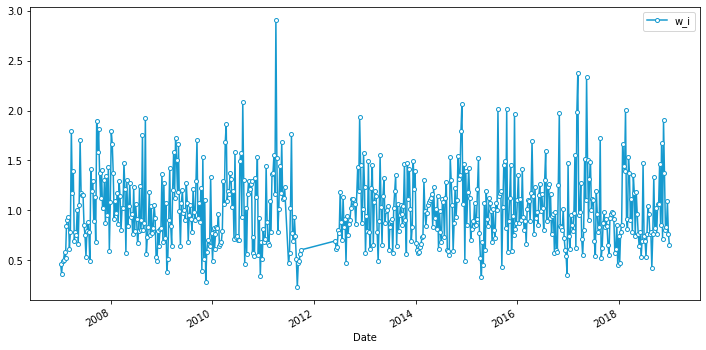

In [30]:
df_final.plot('Date',
              'w_i',
              figsize=(12,6),
              marker = 'o',
              markersize = 4,
              mfc = 'white',        
              color = '#169acf')

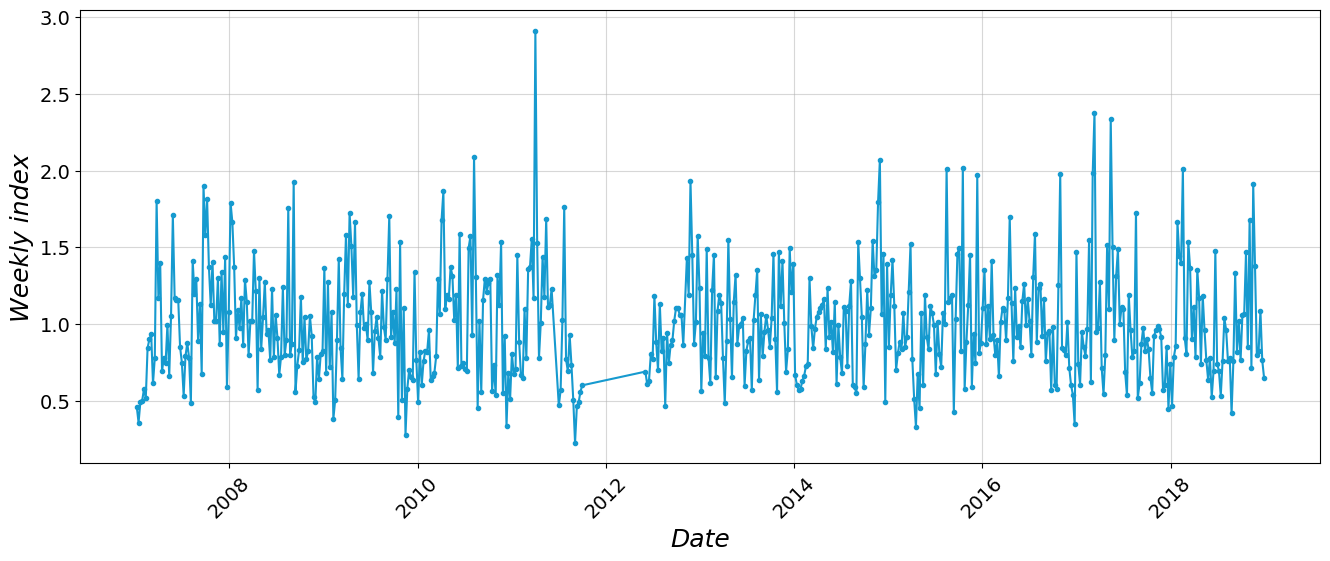

<Figure size 432x288 with 0 Axes>

In [31]:
x = df_final['Date']
y = df_final['w_i']
dates = df_final.Date.dt.year

fig = plt.figure(figsize = (16, 6), dpi = 100)
ax = fig.add_axes()
plt.plot(x, y, marker = 'o',
         markersize = 3,
         #label = 'Weekly index',
         color = '#169acf')
plt.xlabel('Date', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.ylabel('Weekly index', fontsize = 18, fontstyle='oblique', fontweight = 'medium')
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(alpha = 0.5)
#plt.legend(loc = 'upper right')
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data for JER/fig6.png',dpi = 300)